# Data Visualization with Gadfly.js

First we'll load the packages we need.

In [1]:
using Gadfly, RDatasets

Now we'll load the `mpg` dataset from `ggplot2` and look at the first few rows.

In [2]:
mpg = dataset("ggplot2", "mpg")
show(first(mpg, 6), allcols=true)

6×11 DataFrame
│ Row │ Manufacturer │ Model        │ Displ   │ Year  │ Cyl   │ Trans        │
│     │ Categorical… │ Categorical… │ Float64 │ Int32 │ Int32 │ Categorical… │
├─────┼──────────────┼──────────────┼─────────┼───────┼───────┼──────────────┤
│ 1   │ audi         │ a4           │ 1.8     │ 1999  │ 4     │ auto(l5)     │
│ 2   │ audi         │ a4           │ 1.8     │ 1999  │ 4     │ manual(m5)   │
│ 3   │ audi         │ a4           │ 2.0     │ 2008  │ 4     │ manual(m6)   │
│ 4   │ audi         │ a4           │ 2.0     │ 2008  │ 4     │ auto(av)     │
│ 5   │ audi         │ a4           │ 2.8     │ 1999  │ 6     │ auto(l5)     │
│ 6   │ audi         │ a4           │ 2.8     │ 1999  │ 6     │ manual(m5)   │

│ Row │ Drv          │ Cty   │ Hwy   │ Fl           │ Class        │
│     │ Categorical… │ Int32 │ Int32 │ Categorical… │ Categorical… │
├─────┼──────────────┼───────┼───────┼──────────────┼──────────────┤
│ 1   │ f            │ 18    │ 29    │ p            │ compact     

And we'll make a scatterplot of `Displ` against `Hwy`. To do that we call the `plot` function passing in a dataframe, mappings of columns of the dataframe to `x` and `y`, and the "geometry" for the plot. In this case we specify `Geom.point`.

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /home/david/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


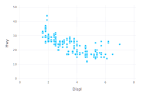

In [3]:
plot(mpg, x=:Displ, y=:Hwy, Geom.point)

# Grammar of Graphics

Gadfly.jl is based on `ggplot2`, which is based on a *grammar of graphics*.

Let's start with the three most central elements of this grammar:

* Data
* Mapping of variables to aesthestic attributes
* Layers of geometric elements

In the plot above, the data variables `Displ` and `Hwy` were mapped to `x` and `y` locations of geometric elements of points.

Now let's look at some additional mappings like `color`, `shape`, and `size` that can also be used with points.

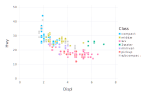

In [4]:
plot(mpg, x=:Displ, y=:Hwy, color=:Class, Geom.point)

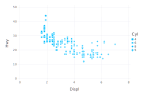

In [5]:
plot(mpg, x=:Displ, y=:Hwy, shape=:Cyl, Geom.point)

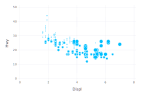

In [6]:
plot(mpg, x=:Displ, y=:Hwy, size=:Drv, Geom.point)

There is nothing, other than perhaps good taste, to stop us from combining these.

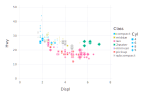

In [7]:
plot(mpg, x=:Displ, y=:Hwy, color=:Class, shape=:Cyl, size=:Drv, Geom.point)

A better way to visualize multiple variables might be to use facets (another element of the grammar of graphics).

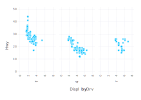

In [8]:
plot(mpg, x=:Displ, y=:Hwy, xgroup=:Drv, Geom.subplot_grid(Geom.point))

We can also plot multiple layers. For example, here we use `Geom.smooth` to add a linear regression line.

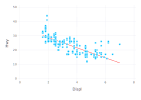

In [9]:
scatter = layer(mpg, x=:Displ, y=:Hwy, Geom.point)
line = layer(mpg, x=:Displ, y=:Hwy, Geom.smooth(method=:lm), style(default_color=colorant"red"))
plot(scatter, line)

### Additional Geoms

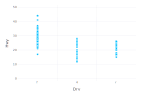

In [10]:
plot(mpg, x=:Drv, y=:Hwy, Geom.point)

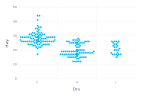

In [11]:
plot(mpg, x=:Drv, y=:Hwy, Geom.beeswarm)

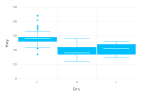

In [12]:
plot(mpg, x=:Drv, y=:Hwy, Geom.boxplot)

### Histograms and densities

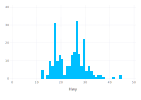

In [13]:
plot(mpg, x=:Hwy, Geom.histogram)

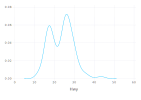

In [14]:
plot(mpg, x=:Hwy, Geom.density)

### Compare distributions of subgroups

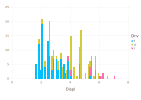

In [15]:
plot(mpg, x=:Displ, color=:Drv, Geom.histogram)

Here again, facets may be a better way to compare subgroups.

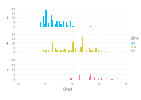

In [16]:
plot(mpg, x=:Displ, color=:Drv, ygroup=:Drv, Geom.subplot_grid(Geom.histogram))

### More information

Other elements of the grammar of graphics include

* Scales - two-way mappings of values in data space to and from values in aesthetic space
* Coordinate systems - cartesian, polar, map projections (Gadfly only supports cartesian for now)
* Themes - everything else (font size, background color, etc.)

See the [Gadfly documentation](http://gadflyjl.org/stable/) for more information.